# Project 1

## Part A

### 0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)

In [24]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/fin_econometrics_2/project1`


In [25]:
Pkg.instantiate()
Pkg.status()

Status `~/Documents/fin_econometrics_2/project1/Project.toml`
  [6d3278bc] ARCHModels v2.3.4
  [fbb218c0] BSON v0.3.7
  [ad839575] Blink v0.12.8
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.0
⌃ [31c24e10] Distributions v0.25.102
⌃ [38e38edf] GLM v1.8.3
  [c601a237] Interact v0.10.5
  [945b72a4] MarketData v0.13.12
  [429524aa] Optim v1.7.8
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [b0e4dd01] RollingFunctions v0.8.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.6
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.23.2
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics v1.9.0
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


### 1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.

In [26]:
using MarketData, Dates

In [67]:
PFE = yahoo("PFE", YahooOpt(period1 = DateTime(2019, 1, 1), period2 = now()))

1225×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2019-01-02 to 2023-11-10
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┤
│ 2019-01-02 │ 40.9108 │ 41.2713 │ 40.4554 │ 41.0342 │ 33.8926  │ 2.6430315e7 │
│ 2019-01-03 │ 41.0247 │ 41.1195 │ 39.8008 │ 39.8861 │ 32.9444  │ 2.8503533e7 │
│ 2019-01-04 │ 40.2657 │ 41.129  │ 40.0949 │ 40.797  │ 33.6967  │ 2.7145348e7 │
│ 2019-01-07 │ 40.8634 │ 41.3852 │ 40.6641 │ 41.0152 │ 33.8769  │ 2.0995469e7 │
│ 2019-01-08 │ 41.3283 │ 41.4611 │ 40.9393 │ 41.2049 │ 34.0337  │ 1.9677231e7 │
│ 2019-01-09 │ 41.2334 │ 41.4326 │ 40.9867 │ 41.1195 │ 33.9631  │ 2.010758e7  │
│ 2019-01-10 │ 41.0057 │ 41.0152 │ 39.8767 │ 40.1423 │ 33.156   │ 3.9731162e7 │
│ 2019-01-11 │ 40.1613 │ 40.6831 │ 39.9905 │ 40.6831 │ 33.6027  │ 2.1064506e7 │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │ ⋮        │ ⋮           │
│ 2023-11-02 │ 30.51   │ 30.65   │ 30.21   

### 2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages


In [113]:
using Statistics, DataFrames, StatsPlots, TimeSeries, RollingFunctions, DataFramesMeta, KernelDensity

ArgumentError: ArgumentError: Package TimeSeries not found in current path, maybe you meant `import/using .TimeSeries`.
- Otherwise, run `import Pkg; Pkg.add("TimeSeries")` to install the TimeSeries package.

In [107]:
df = DataFrame(PFE)
df = @transform(df, :returns = [NaN; diff(log.(:Close))])
df = @transform(df, :volatility = runstd(:returns, 30))
df = df[31:end,:]

Row,timestamp,Open,High,Low,Close,AdjClose,Volume,returns,volatility
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019-02-14,39.5636,39.962,39.4877,39.8197,33.1768,1.98649e7,0.0064539,0.0155556
2,2019-02-15,40.2087,40.3321,39.9241,40.2277,33.5167,1.9169e7,0.0101933,0.0147902
3,2019-02-19,40.0759,40.6641,40.0285,40.4175,33.6748,2.4433e7,0.00470593,0.0142098
4,2019-02-20,40.351,40.3795,39.7818,40.038,33.3586,2.73549e7,-0.00943402,0.0142632
5,2019-02-21,39.8672,40.1518,39.7154,39.981,33.3112,1.96119e7,-0.00142281,0.0142266
6,2019-02-22,40.1328,40.9203,40.0569,40.759,33.9594,2.47793e7,0.019272,0.0146973
7,2019-02-25,40.8349,41.148,40.74,40.8729,34.0542,2.52748e7,0.00278935,0.0140016
8,2019-02-26,40.759,41.0152,40.6072,40.8159,34.0068,1.6549e7,-0.00139366,0.0137949
9,2019-02-27,40.778,41.0057,40.6167,40.7305,33.9357,1.64751e7,-0.00209432,0.0136135


In [108]:
stats = describe(df, :detailed)
println(stats)

9×11 DataFrame
 Row │ variable    mean         std        min         q25         median        q75         max         nunique  nmissing  eltype   
     │ Symbol      Union…       Union…     Any         Union…      Any           Any         Any         Union…   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                           2019-02-14              2021-06-29    2022-09-04  2023-11-10  1195            0  Date
   2 │ Open        40.6808      6.68102    27.2865     35.6452     39.14         45.435      60.6                        0  Float64
   3 │ High        41.0988      6.8214     28.0645     35.9736     39.52         45.935      61.71                       0  Float64
   4 │ Low         40.2382      6.57739    26.4516     35.341      38.87         44.98       59.83                       0  Float64
   5 │ Close       40.6643      6.72097    27.0304     35.

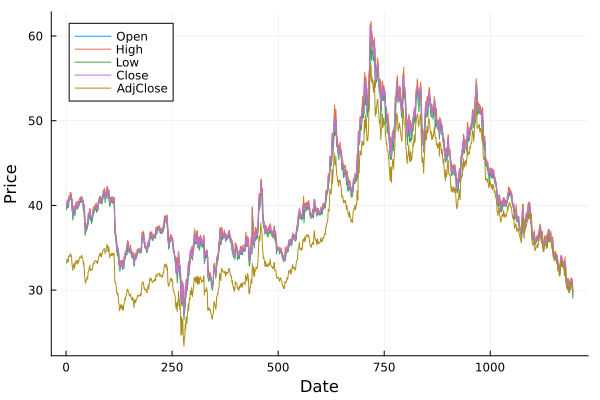

In [72]:
plot()
@df df plot!(:Open, label="Open")
@df df plot!(:High, label="High")
@df df plot!(:Low, label="Low")
@df df plot!(:Close, label="Close")
@df df plot!(:AdjClose, label="AdjClose")

plot!(
    legend=:topleft,
    xlabel="Date",
    ylabel="Price"
)

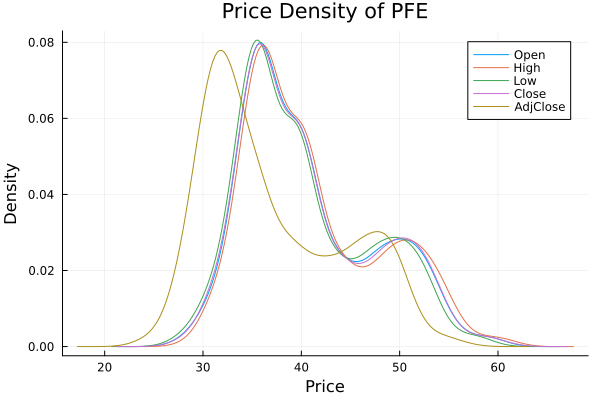

In [73]:
plot()
@df df density!(:Open, label="Open")
@df df density!(:High, label="High")
@df df density!(:Low, label="Low")
@df df density!(:Close, label="Close")
@df df density!(:AdjClose, label="AdjClose")

plot!(
    legend=:topright,
    xlabel="Price",
    ylabel="Density",
    title = "Price Density of PFE"
)

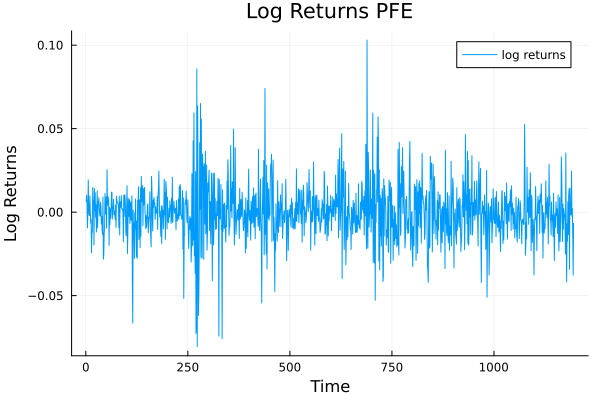

In [74]:
plot()
@df df plot(:returns, label="log returns")

plot!(
    legend=:topright,
    xlabel="Time",
    ylabel="Log Returns",
    title = "Log Returns PFE"
)

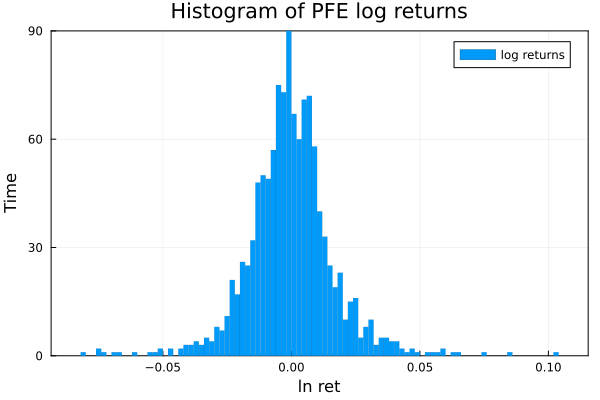

In [75]:
plot()
@df df histogram(:returns, l=0, framestyle=:box, label="log returns", bins = 100)

plot!(
    legend=:topright,
    xlabel="ln ret",
    ylabel="Time",
    title = "Histogram of PFE log returns"
)

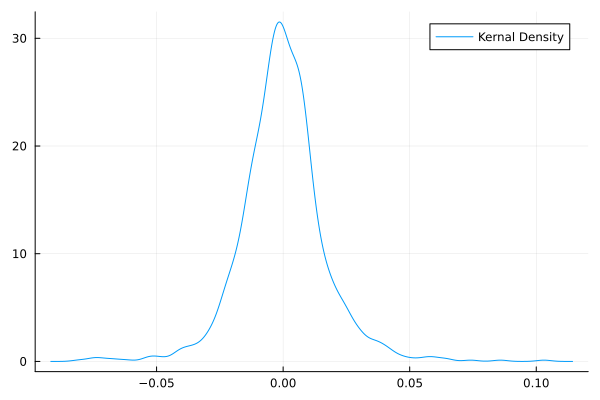

In [123]:
plot(kde(df[:, :returns]), label="Kernal Density")

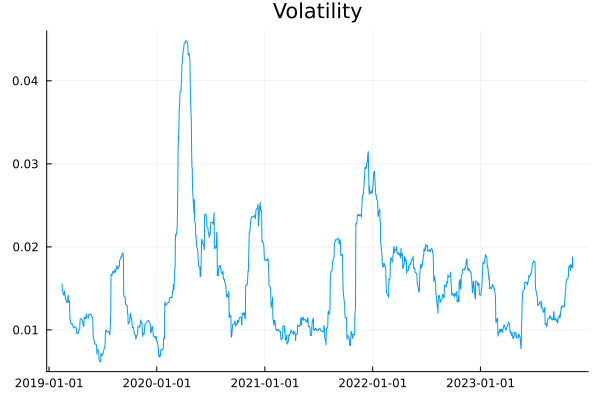

In [124]:
plot(df.timestamp, df.volatility, title = "Volatility", legend=false)

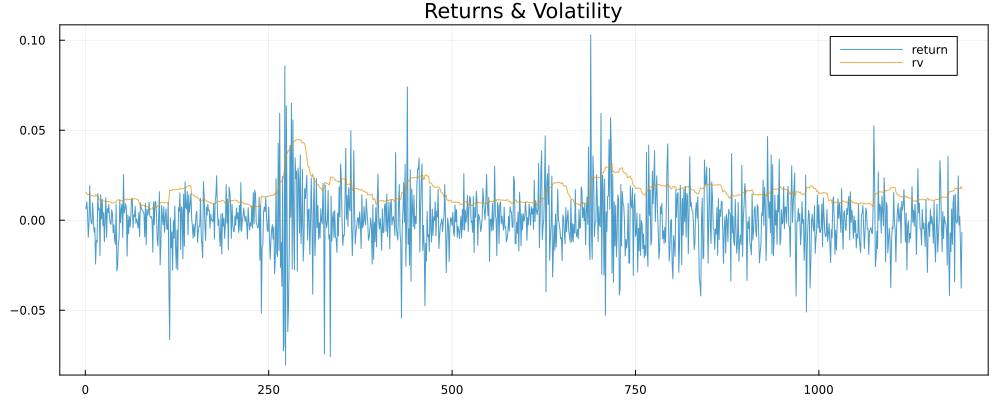

In [159]:
p1 = plot(df[:, :returns], line=(1., 0.7, :solid), label="return", palette=:seaborn_colorblind, size=(1000,400))
p1 = plot!(df[:, :volatility], line=(1., 0.7, :solid), label="rv", framestyle=:box, title = "Returns & Volatility")

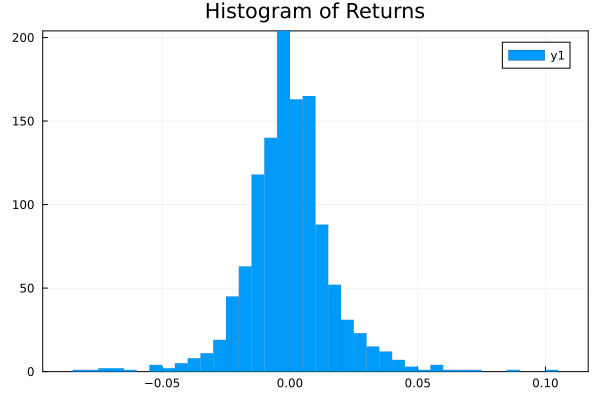

In [120]:
p2 = histogram(df[:, :returns], l=0, framestyle=:box, title = "Histogram of Returns")

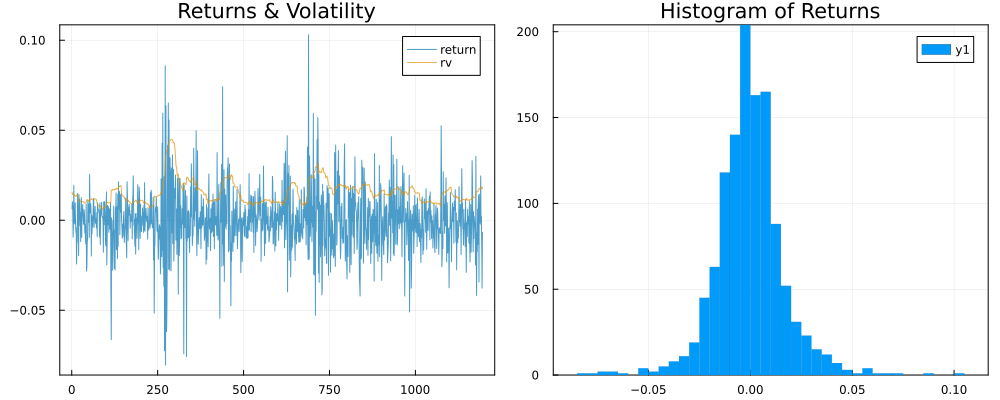

In [82]:
plot(p1, p2, size=(1000,400))

In [83]:
returns = df[:, :returns]
returns = returns[2:end]

1194-element Vector{Float64}:
  0.010193294197318181
  0.004705932701643878
 -0.00943401605152916
 -0.0014228127133386614
  0.019272026104818707
  0.00278935329204133
 -0.0013936550843984818
 -0.002094315309264072
  0.009735846255288116
  0.0002306377162497597
  ⋮
  0.000327278691426347
 -0.0016374328472279487
 -0.0003278151152121822
  0.02461264137996455
 -0.002562461363699864
  0.0022425125527800738
 -0.013855546290440834
 -0.037690411592790074
 -0.0067613509780439784

In [84]:
size(returns)

(1194,)

In [86]:
# empty array
plots_array = []
# loop
for t in 1:250:1000
    p0 = plot(returns[t:t+200-1], l=(0.5,0.7), title="sub-sample $(t:t+200-1)", label="")
    push!(plots_array, p0) # this pushes = adds plot p0 into the array to store it
end

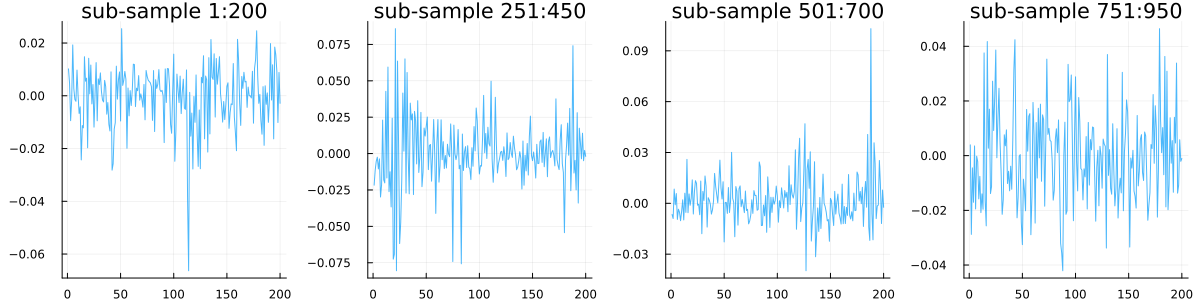

In [87]:
plot(plots_array..., layout=(1,:), size=(1200,300))

In [88]:
# empty array
subsample_array = []
# loop
for t in 1:250:1000
    push!(subsample_array, returns[t:t+200-1]) # this pushes = adds plot p0 into the array to store it
end

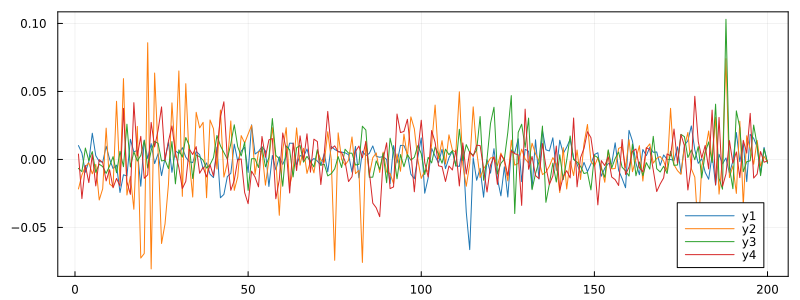

In [89]:
plot(subsample_array, size=(800,300), framestyle=:box, palette=:tab10)

### 3) Use `ARCHModels.jl` to **model** asset data and **forecast**.

#### GARCH

Univariate GARCH (p, q) model:

$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^q \beta_i \sigma_{t-i}^2$

In [136]:
using ARCHModels

In [145]:
candidate_p = [1, 2]
candidate_q = [1, 2]

best_aic = Inf
best_model = nothing

for p in candidate_p
    for q in candidate_q
        model = fit(GARCH{p, q}, returns)
        aic = StatsBase.aic(model) 
        
        println("GARCH($p, $q) - AIC: $aic")
        
        if aic < best_aic
            best_aic = aic
            best_model = model
        end
    end
end

GARCH(1, 1) - AIC: -6579.5062502705405
GARCH(1, 2) - AIC: -6574.008296510916
GARCH(2, 1) - AIC: -6577.430366917879
GARCH(2, 2) - AIC: -6575.410297622453


In [146]:
garch_fit = fit(GARCH{1, 2}, returns)


GARCH{1, 2} model with Gaussian errors, T=1194.

Mean equation parameters:
────────────────────────────────────────────────
       Estimate   Std.Error    z value  Pr(>|z|)
────────────────────────────────────────────────
μ  -0.000114047  0.00042713  -0.267007    0.7895
────────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────────
       Estimate   Std.Error      z value  Pr(>|z|)
──────────────────────────────────────────────────
ω   1.94052e-5   1.69518e-5  1.14473        0.2523
β₁  0.806781     0.114212    7.06389        <1e-11
α₁  0.118427     0.053044    2.23262        0.0256
α₂  4.27642e-50  0.0831024   5.14597e-49    1.0000
──────────────────────────────────────────────────


predict the conditional variances for the next three time steps for the GARCH(1,2)

In [147]:
predict.(garch_fit, :variance, 1:3)

3-element Vector{Float64}:
 0.0003167389881266251
 0.0003124544931446401
 0.0003084904462141975

#### HAR

Calculating daily, weekly and monthly Realized Volatilities:

In [93]:
function HAR_regressors(data)

    RVd = data[22:end-1] # days
    RVw = zeros(length(RVd)) # weeks
    for i in 22:(length(data)-1)
       temp = 0
       for h in 0:4
           temp = temp + data[i-h]
       end
       RVw[i-21]= temp / 5
    end
    
    RVm = zeros(length(RVd)) # months
    for i in 22:(length(data)-1) 
       temp = 0
       for h in 0:21
           temp = temp + data[i-h]
       end
       RVm[i-21] = temp / 22;
    end

    return [RVd RVw RVm]
end

HAR_regressors

##### OLS Estimator

$X′X\beta=X′y$

In [94]:
function OLSestimatorconst(y,x)
    x = [ones(size(x)[1]) x]
    return (transpose(x) * x) \ (transpose(x) * y)
end

OLSestimatorconst (generic function with 1 method)

In [95]:
OLSestimatorconst(returns[23:end], HAR_regressors(returns))

4-element Vector{Float64}:
 -0.00023914797418051582
 -0.09163489598708967
  0.1340672732032678
  0.08511125374864824

The estimated coefficients are as follows:

- The intercept ($\beta_0\beta_0$​): approximately -0.000239
- Coefficient for RVd ($\beta_1\beta_1$): approximately -0.0916
- Coefficient for RVw ($\beta_2\beta_2$): approximately 0.1341
- Coefficient for RVm ($\beta_3\beta_3$): approximately 0.0851

In [96]:
using GLM

In [97]:
[returns[23:end] HAR_regressors(returns)]

1172×4 Matrix{Float64}:
 -0.00307805    0.0116516     0.00271336    0.000356003
  0.0042594    -0.00307805    0.000760273  -0.00024724
 -0.0118766     0.0042594     0.00555459   -0.000267537
  0.000955296  -0.0118766     0.00033481   -0.000378566
  0.0125728     0.000955296   0.000382316  -0.00027047
 -0.00947421    0.0125728     0.000566558  -0.000574981
  0.00640501   -0.00947421   -0.000712675  -0.00113242
  0.00424724    0.00640501   -0.000283554  -0.000777931
  0.00867431    0.00424724    0.00294122   -0.000489678
  0.00163266    0.00867431    0.00448503   -0.00053793
  ⋮                                        
  0.000327279   0.0145073    -0.00188958   -0.00223545
 -0.00163743    0.000327279   0.000852594  -0.00372518
 -0.000327815  -0.00163743   -0.00143698   -0.00484272
  0.0246126    -0.000327815  -0.00428171   -0.00480402
 -0.00256246    0.0246126     0.00749639   -0.0028872
  0.00224251   -0.00256246    0.00408244   -0.00322149
 -0.0138555     0.00224251    0.00446549   -0.0

In [148]:
data_har = DataFrame([returns[23:end] HAR_regressors(returns)], [:rv_t, :rv_d, :rv_w, :rv_m]);

In [162]:
har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rv_t ~ 1 + rv_d + rv_w + rv_m

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)   Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.000239148  0.000495132  -0.48    0.6292  -0.0012106   0.000732299
rv_d         -0.0916349    0.0327886    -2.79    0.0053  -0.155966   -0.0273038
rv_w          0.134067     0.0842924     1.59    0.1120  -0.0313142   0.299449
rv_m          0.0851113    0.14898       0.57    0.5679  -0.207187    0.377409
─────────────────────────────────────────────────────────────────────────────────

- $\beta_0$​ (Intercept): -0.000239148
- $\beta_1\beta_1$​ (rv_d): -0.0916349
- $\beta_2\beta_2​$ (rv_w): 0.134067
- $\beta_3\beta_3​$ (rv_m): 0.0851113

In [150]:
har_prediction = GLM.predict(har); # fit

In [151]:
data = select(df, [:timestamp, :returns])
data = data[2:end, :]

Row,timestamp,returns
,Date,Float64
1,2019-02-15,0.0101933
2,2019-02-19,0.00470593
3,2019-02-20,-0.00943402
4,2019-02-21,-0.00142281
5,2019-02-22,0.019272
6,2019-02-25,0.00278935
7,2019-02-26,-0.00139366
8,2019-02-27,-0.00209432
9,2019-02-28,0.00973585


### 4) **Plot** forecasts.


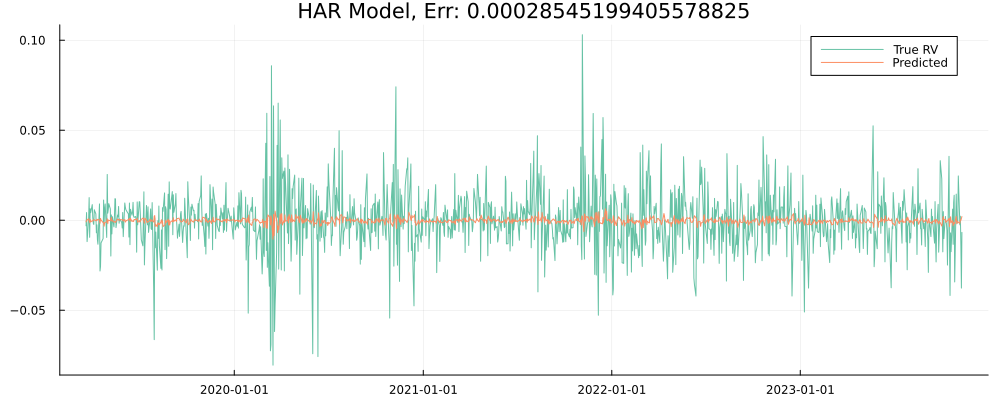

In [154]:
p1 = plot(data[23:end,:timestamp], data_har.rv_t, lab="True RV", leg=:topright, 
    title="HAR Model, Err: $(mean(abs2, data_har.rv_t - har_prediction))", palette=:Set2_3)
p1 = plot!(data[23:end,:timestamp], har_prediction, lab="Predicted", size=(1000,400))

In [103]:
predictors = HAR_regressors(returns);

In [104]:
describe(DataFrame(predictors, [:rv_d, :rv_w, :rv_m]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,rv_d,-0.0002475,-0.0805014,-0.000718423,0.103055,0,Float64
2,rv_w,-0.000212823,-0.0333083,-4.31108e-5,0.0324366,0,Float64
3,rv_m,-0.000213949,-0.0104868,-0.000364047,0.0115184,0,Float64


## Part B

### - *OLS* vs *ML* estimation HAR
    - Estimate coefficients with different approaches
    - Optim.jl vs Flux.jl
    - Discuss coefficients, show them in scatter, histograms
    - test different activations in NN
    - play around with regularizations
    - Make Q-Q plots, a table of performance

In [106]:
using Optim

In [169]:
Pkg.add("DataFrames")
Pkg.add("GLM")
Pkg.add("ScikitLearn")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


   Installed ScikitLearnBase ─ v0.5.0
   Installed Conda ─────────── v1.9.1
   Installed IterTools ─────── v1.8.0
   Installed PyCall ────────── v1.96.2


   Installed ScikitLearn ───── v0.7.0


    Updating `~/.julia/environments/v1.9/Project.toml`
  [3646fa90] + ScikitLearn v0.7.0
    Updating `~/.julia/environments/v1.9/Manifest.toml`
 

 [8f4d0f93] + Conda v1.9.1
  [c8e1da08] + IterTools v1.8.0
  [438e738f] + PyCall v1.96.2
  [3646fa90] + ScikitLearn v0.7.0
  [6e75b9c4] + ScikitLearnBase v0.5.0
  [81def892] + VersionParsing v1.3.0
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/8c86e48c0db1564a1d49548d3515ced5d604c408/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1cb97fa63a3629c6d892af4f76fcc4ad8191837c/build.log`


Precompiling project...


  ✓ IterTools
  ✓ ScikitLearnBase
  ✓ VersionParsing


  ✓ Conda


  ✓ PyCall


  ✓ ScikitLearn
  6 dependencies successfully precompiled in 13 seconds. 245 already precompiled.


In [168]:
using DataFrames
using GLM
using ARCHModels

data_har = DataFrame([returns[23:end] HAR_regressors(returns)], [:rv_t, :rv_d, :rv_w, :rv_m])

# OLS estimation
har_ols = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

# ML estimation
model = fit(GARCH{1, 1}, data_har.rv_t)
har_ml = HAR(data_har.rv_t, HAR_regressors(returns), model)

# Display results
println("OLS Results:")
display(har_ols)

println("\nML Results:")
display(har_ml)

UndefVarError: UndefVarError: `HAR` not defined

-------

In [105]:
Pkg.activate()

  Activating project at `~/.julia/environments/v1.9`
